# Homework 3 (80 points)

In this homework, you will learn about hash tables and continue to practice your algorithmic solving skills.

The objectives for this homework are:

* Understabd hashing
* Understand hash tables with linear chaining
* Practice solving an algorithmic problem using a data structure
* Practice solving with an algorithmic problem with little guidance

In [1]:
import array
import random
import time
import tracemalloc
import matplotlib.pyplot as plt
import string
from scipy.stats import poisson

We will use the following function that generates random strings.

In [2]:
def genRandomString():
    size = poisson.rvs(10, size=1)[0]
    return ''.join(random.choice(string.ascii_letters) for i in range(size))

Note that the length of strings varies from call to call.

In [33]:
genRandomString()

'sBdlCpGESpVbo'

In [34]:
genRandomString()

'lEOFXRgJ'

In [35]:
genRandomString()

'tZlGtgoonP'

In [3]:
def timer(tracker,key):
    start = time.time()
    tracker.put(key)
    end = time.time()    
    return end - start

In [4]:
def compareTrackers(trackers,n):
    assert(len(trackers) >= 1)
    time = []
    
    for i in range(len(trackers)):
        time.append(array.array('f',n * [0]))
    for i in range(n):
        s = genRandomString()
        for j in range(len(trackers)):
            time[j][i] = timer(trackers[j],s)
        
    x = range(n)
    
    plt.xlabel('Problem size')
    plt.ylabel('Time (s)')
    for j in range(len(trackers)):
        plt.scatter(x, time[j], label=type(trackers[j]).__name__, s=1)
    plt.title("Comparison of different functions") 
    plt.legend(loc="upper left")

In [5]:
class MethodImplementationMissing(Exception):
    
    def __init__(self, message):
        self.message = message

## Part 1 (20 points)

Your goal in this part of the homework is to implement a datatype called Tracker that you can use to keep track of how many times a string appears in a list. For example, if we were given a list such as ['a','b','a'] we want to know that 'a' appears twice and 'b' appears once. A tracker has two methods, put and get. The put method allows you to use the tracker to record the occurance of string, while the get method returns the count for some string. Here is the abstract data type.

In [36]:
class Tracker:
    
    def put(self,key):
        raise MethodImplementationMissing('put')
    
    def get(self,key):
        raise MethodImplementationMissing('get')

One possible way to implement Tracker is to use a list of all the strings that we put in the tracker. A slightly better, yet still naive, implementation would record what strings have been put in the tracker so far, and record the number of occurences. Here is a possible implementation.

In [37]:
class naiveImplementation(Tracker):
    
    def __init__(self):
        self.keys = []
        self.counts = []
        
    def get(self,key):
        try:
            index = self.keys.index(key)
            return self.counts[index]
        except ValueError:
            return 0
        
    def put(self,key):
        try:
            index = self.keys.index(key)
            value = self.counts[index] + 1
            self.counts.insert(index,value)
        except ValueError:
            self.keys.append(key)
            self.counts.append(1)
            
    def print(self):
        print(self.counts)
        print(self.keys)

We can declare a new tracker.

In [45]:
naive_tracker = naiveImplementation()

And try it out on our example.

In [46]:
l = ['a','b','a']
for key in l:
    naive_tracker.put(key)

In [50]:
print('a:', naive_tracker.get('a'))
print('b:',naive_tracker.get('b'))
print('c:',naive_tracker.get('c'))

a: 2
b: 1
c: 0


We can use the compareTrackers definition to see how long a put takes as the number of elements in the tracker increases.

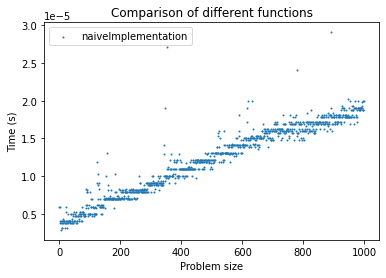

In [51]:
compareTrackers([naive_tracker],1000)

We are going to use a hash table with linear chaining to implement a slightly better tracker. To that end, we need to be bale to hash strings. This can be done very easily using python's hash function.

In [10]:
example = 'hello, world!'

In [11]:
print(hash(example))

8072055050985534680


In practice, we want to set the size of our hash table to a chosen fixed size, so the numbers returned by hash are too large. 

**Problem (1 point)** Implement a my_hash function that hashes a string and ensures that the returned hash is less than size.

In [52]:
def my_hash(string,size):
    return hash(string) % size 

**Problem (19 points)** Use a hash table with linear chaining to implement the Tracker data type.

In [55]:
class LinearChaining(Tracker):
    
    def __init__(self,size):
        self.size = size
        self.hashTable = size * [([],[])]
    
    def get(self,key):
        hKey = my_hash(key,self.size)
        try:
            index = self.hashTable[hKey][0].index(key)
            return self.hashTable[hKey][1][index]
        except ValueError:
            return 0
        
    def put(self,key):
        hKey = my_hash(key,self.size)
        try:
            index = self.hashTable[hKey][0].index(key)
            value = self.hashTable[hKey][1][index] + 1
            self.hashTable[hKey][1].insert(index,value)
        except ValueError:
            self.hashTable[hKey][0].append(key)
            self.hashTable[hKey][1].append(1)     

We can compare its runtime behavior to that of the naive implementation.

In [16]:
tracker = LinearChaining(10000)

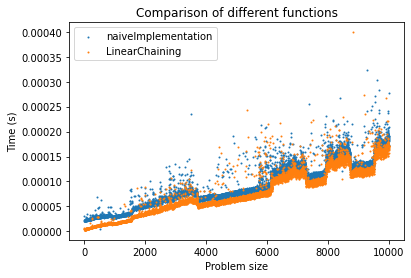

In [17]:
compareTrackers([naive_tracker,tracker],10000)

Note that even though this implementation is slightly better (and it would become more noticable for large sequences of strings), it is still not great because we need to keep track of the strings, which takes a lot of space. On top of this, comparing strings is expensive. 

**Bonus problem (10 points)** Implement a tracker that does not store the strings at all. Note that you are allowed to make a few and rare small errors where a string might be counted too many times.

## Part 2 (30 points)

In this problem, your goal is to compute the number of inversions in an input array. For an array A of size n, we say the a pair of indices (i,j) into the array is an inversion if i < j and A[i] > A[j]. For example, consider the following array:

In [18]:
arr = array.array('i',[2,3,8,6,1])

This array has 5 inversion: (8,6), (8,1), (2,1), (3,1), and (6,1). A simple solution is to consider every possible pair of indices.

In [19]:
def naiveCountInversion(arr):
    n = len(arr)
    count = 0
    for i in range(n):
        for j in range(i,n):
            if arr[i] > arr[j]:
                count += 1
    return count

In [20]:
naiveCountInversion(arr)

5

However, this is a naive solution in O(n * n). 

**Problem:** Devise and implement an algorithm that solves the inversion problem in O(n log n).

In [21]:
def countMerge(arr, l, m, r): 
    assert(isinstance(arr,array.array))
    assert(isinstance(l,int))
    assert(isinstance(m,int))
    assert(isinstance(r,int))
    assert(l >= 0)
    assert(m >= l)
    assert(r >= m)
    n1 = m - l + 1
    n2 = r- m 
  
    L = [0] * (n1) 
    R = [0] * (n2) 
  
    for i in range(0 , n1): 
        L[i] = arr[l + i] 
  
    for j in range(0 , n2): 
        R[j] = arr[m + 1 + j] 
  
    i = 0     
    j = 0      
    k = l     
  
    count = 0

    while i < n1 and j < n2 : 
        if L[i] <= R[j]: 
            arr[k] = L[i] 
            i += 1
        else: 
            count += n1 - i
            arr[k] = R[j] 
            j += 1
        k += 1
  
    while i < n1: 
        arr[k] = L[i] 
        i += 1
        k += 1
  
    while j < n2: 
        arr[k] = R[j] 
        j += 1
        k += 1
    
    return count

In [22]:
def countInversionsAux(arr,l,r):
    assert(isinstance(arr,array.array))
    assert(isinstance(l,int))
    assert(isinstance(r,int))
    assert(l >= 0)
    assert(r >= l)
    assert(len(arr) >= 2)
    if l < r: 
        m = (l+(r-1))//2
        count_left = countInversionsAux(arr, l, m) 
        count_right = countInversionsAux(arr, m+1, r) 
        count_merge = countMerge(arr, l, m, r) 
        return count_left + count_merge + count_right
    return 0

In [23]:
def countInversions(arr):
    assert(isinstance(arr,array.array))
    if (len(arr) >= 2):
        count = countInversionsAux(arr,0,len(arr)-1)
        return count
    return 0

In [24]:
countInversions(arr)

5

## Part 3 (30 points)

In this problem, your goal is to merge a list of K arrays of integers that are already sorted. For example, consider the following three arrays:

In [25]:
arr1 = array.array('i',[1,3,7,11])
arr2 = array.array('i',[2,4,13])
arr3 = array.array('i',[5,6,8])

A possible input with k=3 would the the following list:

In [26]:
input = [arr1,arr2,arr3]

You need to devise and implement an algorithm that will return a single sorted array containing all the values from all 3 arrays. In this example, the ouput would be:

In [27]:
output = array.array('i', [1, 2, 3, 4, 5, 6, 7, 8, 11, 13])

Of course, a simple solution would be to combine all these arrays into one and sort it. This could look like:

In [28]:
def naiveMultimerge(arrs):
    n = sum(map(len,arrs))
    result = array.array('i', bytearray(4*n))
    idx = 0
    for arr in arrs:
        for v in arr:
            result[idx] = v
            idx += 1
    return sorted(result)

In [29]:
naiveMultimerge(input)

[1, 2, 3, 4, 5, 6, 7, 8, 11, 13]

If n is the sum of the length of all the arrays in the input list, this solution is in O(n log n). I want you to do better. You could think of an nice divide and conquer solution, but instead I want you to practice solving algorithmic problems with the help of a data structure. You should devise an algorithm that works in O(n log k) where k is the number of arrays in the input list. You should start by defining and implementing your data type, and you are allowed to copy, paste, and *modify* implementations from previous homework or class. 

**Problem:** Devise and implement an algorithm that solves the multimerge problem in O(n log k).

In [30]:
class MinHeap:
    
    def __init__(self):
        self.heap_list = [0]
        self.id = [0]
        self.current_size = 0
 
    def swim(self, i):
        while i // 2 > 0:
            if self.heap_list[i] < self.heap_list[i // 2]:
                self.heap_list[i], self.heap_list[i // 2] = self.heap_list[i // 2], self.heap_list[i]
                self.id[i], self.id[i // 2] = self.id[i // 2], self.id[i]
            i = i // 2
 
    def insert(self, k, id):
        self.heap_list.append(k)
        self.id.append(id)
        self.current_size += 1
        self.swim(self.current_size)

    def min_child(self, i):
        if (i * 2)+1 > self.current_size:
            return i * 2
        else:
            if self.heap_list[i*2] < self.heap_list[(i*2)+1]:
                return i * 2
            else:
                return (i * 2) + 1        
        
    def sink(self, i):
        while (i * 2) <= self.current_size:
            mc = self.min_child(i)
            if self.heap_list[i] > self.heap_list[mc]:
                self.heap_list[i], self.heap_list[mc] = self.heap_list[mc], self.heap_list[i]
                self.id[i], self.id[mc] = self.id[mc], self.id[i]
            i = mc
 
    def delete_min(self):
        if len(self.heap_list) == 1:
            return None

        root = self.heap_list[1]
        root_id = self.id[1]
        self.heap_list[1] = self.heap_list[self.current_size]
        self.id[1] = self.id[self.current_size]
        *self.heap_list, _ = self.heap_list
        *self.id, _ = self.id
        self.current_size -= 1
        self.sink(1)
        return (root, root_id)

In [31]:
def multimerge(arrs):
    k = len(arrs)
    total_length = 0
    for id in range(k):
        total_length += len(arrs[id])
        
    result = array.array('i',[0] * total_length)
    mh = MinHeap()
    indices = array.array('i',[0] * k)
    
    for id in range(k):
        mh.insert(arrs[id][indices[id]],id)
        indices[id] += 1
    
    for i in range(total_length):
        (v, id) = mh.delete_min()
        result[i] = v
        if (indices[id] < len(arrs[id])):
            mh.insert(arrs[id][indices[id]],id)
            indices[id] += 1
            
    return result

In [32]:
multimerge([[1,3,7,11],[2,4,13],[5,6,8]])

array('i', [1, 2, 3, 4, 5, 6, 7, 8, 11, 13])